# Proyek Submission Machine Learning Terapan: Book Rekomendation
- **Nama:** Moh Hasbi Rizqulloh
- **Email:** hasbirizqulloh95@gmail.com
- **ID Dicoding:** hasbirizqulloh

# **1. Import Semua Packages/Library yang Digunakan**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# **2. Data Loading**

## Download Dataset
Pada tahap ini, kita melakukan proses **pengunduhan dataset** menggunakan `kagglehub`.
Tujuan dari tahap ini adalah untuk mendapatkan file dataset terbaru yang akan digunakan dalam proyek ini.

Metode:  
- Menggunakan fungsi `dataset_download()` dari library `kagglehub` untuk mengunduh dataset dari Kaggle.

Output:  
- Folder lokal berisi file dataset yang akan diproses lebih lanjut.

---


In [2]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/book-recommendation-dataset


In [3]:
os.listdir(path)

['Ratings.csv',
 'Users.csv',
 'classicRec.png',
 'Books.csv',
 'DeepRec.png',
 'recsys_taxonomy2.png']

## Membaca Dataset Buku
Pada tahap ini, kita melakukan **pembacaan file dataset** berisi data buku yang telah diunduh sebelumnya.
File `Books.csv` akan dibaca dan dimuat ke dalam sebuah DataFrame untuk keperluan analisis lebih lanjut.

---


In [4]:
df_book = pd.read_csv(os.path.join(path, "Books.csv"))
df_book

<ipython-input-4-bc512414bc34>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_book = pd.read_csv(os.path.join(path, "Books.csv"))


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


## Membaca Dataset Rating
Pada tahap ini, kita melakukan **pembacaan file dataset** berisi data rating buku yang diberikan oleh pengguna.
File `Ratings.csv` akan dimuat ke dalam sebuah DataFrame untuk dianalisis pada tahap selanjutnya.

---


In [5]:
df_rating = pd.read_csv(os.path.join(path, "Ratings.csv"))
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Membaca Dataset Pengguna
Pada tahap ini, kita melakukan **pembacaan file dataset** berisi data pengguna yang memberikan rating terhadap buku.
File `Users.csv` akan dimuat ke dalam sebuah DataFrame untuk analisis lebih lanjut.

---


In [6]:
df_user = pd.read_csv(os.path.join(path, "Users.csv"))
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [7]:
print(df_book.shape)
print(df_rating.shape)
print(df_user.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


## Insight

Setelah memuat dataset `Books.csv`, `Ratings.csv`, dan `Users.csv`, berikut beberapa wawasan yang dapat diperoleh:

1. **Distribusi Buku**:  
   Dataset `Books.csv` berisi informasi tentang buku-buku yang terdaftar di platform. Dengan menganalisis dataset ini, kita bisa mengetahui jumlah total buku yang tersedia serta kategori buku yang paling banyak terdaftar. Hal ini dapat membantu kita memahami jenis buku yang populer di platform dan sebaran kategori buku tersebut.

2. **Rating Buku**:  
   Melalui dataset `Ratings.csv`, kita dapat melihat bagaimana pengguna memberikan rating pada buku-buku yang ada. Dengan menganalisis distribusi rating, kita dapat mengetahui apakah sebagian besar buku mendapatkan rating tinggi atau rendah. Hal ini juga bisa memberikan gambaran tentang kualitas buku yang ada di platform berdasarkan persepsi pengguna.

3. **Pengguna Aktif**:  
   Dataset `Users.csv` berisi informasi mengenai pengguna yang memberikan rating. Dengan melakukan eksplorasi pada data ini, kita bisa mengetahui jumlah pengguna yang aktif memberikan rating serta pola perilaku mereka dalam memberikan rating pada buku. Apakah ada pengguna yang memberikan rating pada banyak buku atau hanya beberapa saja, serta seberapa banyak variasi rating yang mereka berikan.

---


# **3. Eksploratory Data Analysis**

## Mengecek Struktur Data

### Menampilkan Informasi Dataset
Pada tahap ini, kita akan memeriksa **informasi umum** dari ketiga dataset yang telah dimuat, yaitu dataset buku, rating, dan pengguna.  
Fungsi `info()` akan memberikan detail tentang jumlah entri, kolom, dan tipe data masing-masing.

---


In [8]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Menampilkan Statistik Deskriptif Dataset
Pada tahap ini, kita menggunakan fungsi **`describe()`** untuk menampilkan statistik deskriptif dari kedua dataset:
- **df_rating**: Dataset yang berisi data rating dari pengguna terhadap buku.
- **df_user**: Dataset yang berisi data pengguna, termasuk usia dan ID pengguna.

Fungsi `describe()` memberikan informasi seperti:
- Jumlah nilai (count)
- Rata-rata (mean)
- Nilai minimum (min)
- Nilai maksimum (max)
- Kuartil (25%, 50%, 75%)
- Standar deviasi (std)

Hal ini akan membantu kita untuk mendapatkan gambaran umum tentang distribusi data dalam kedua dataset tersebut.

---


In [11]:
df_rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [12]:
df_user.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### 📊 **Insight Struktur Data**

1. **Kualitas Data Buku**
   - Kolom **Year-Of-Publication** masih bertipe `object`, yang menunjukkan kemungkinan adanya data tidak valid atau data yang perlu dikonversi menjadi tipe numerik (misalnya tahun publikasi buku).
   - Terdapat nilai kosong pada beberapa kolom:
     - **Book-Author**: 2 entri kosong
     - **Publisher**: 2 entri kosong
     - **Image-URL-L**: 3 entri kosong  
   Hal ini perlu ditangani dengan mengisi atau menghapus entri yang kosong untuk menjaga integritas data.
   - Memilih beberapa fitur relevan dari dataset `Books.csv` yang akan digunakan untuk analisis lebih lanjut karena ada beberapa fitur yang kurang relevant contohnya, seperti **Image-URL-L**.


2. **Data Rating Lengkap tapi Perlu Validasi**
   - Dataset **Rating** tampak lengkap karena tidak ada nilai yang hilang (missing values) pada kolom-kolom utama (`User-ID`, `Book-Rating`).
   - Namun, distribusi nilai **Book-Rating** menunjukkan bahwa terdapat nilai `0`, yang kemungkinan berarti pengguna tidak memberikan rating (misalnya tidak menyukai atau tidak menilai buku tersebut). Hal ini perlu divalidasi untuk memastikan apakah nilai `0` memang tidak seharusnya dihitung sebagai rating.

   **Deskripsi Rating**:
   - **Rata-rata Rating**: 2.87, menunjukkan mayoritas rating berada di bawah nilai 5 (dari rentang 0–10).
   - **Sebaran Rating**: Banyak rating yang diberikan bernilai 0, 7, dan 10, yang dapat menunjukkan pola tertentu (misalnya rating ekstrem lebih sering diberikan).
   - **Minimum Rating**: 0, yang mungkin berarti "tidak memberikan rating" atau "rating tidak sah".
   - **Maksimum Rating**: 10, menunjukkan nilai rating tertinggi yang dapat diberikan.

3. **Data Pengguna Tidak Lengkap & Perlu Pembersihan**
   - Kolom **Age** pada dataset pengguna memiliki banyak nilai kosong (sekitar 40% kosong), yang perlu ditangani dengan mengisi atau menghapus baris yang relevan.
   - **Outlier Usia**: Ditemukan usia pengguna yang tidak realistis, seperti usia `0` dan usia hingga `244`, yang perlu diverifikasi lebih lanjut apakah ini adalah kesalahan input data atau memang data pengguna yang sah.
   - **Lokasi**: Kolom **Location** bisa dipecah menjadi komponen geografis yang lebih spesifik (seperti kota dan negara), yang akan memungkinkan analisis demografis lebih lanjut.

   **Deskripsi Pengguna**:
   - **Rata-rata Usia**: 34.75 tahun, dengan standar deviasi yang cukup besar (14.43), menunjukkan variabilitas yang cukup tinggi dalam usia pengguna.
   - **Usia Minimum**: 0, yang kemungkinan adalah nilai yang salah atau outlier.
   - **Usia Maksimum**: 244, yang juga menunjukkan outlier yang perlu diperiksa.

4. **Koneksi Antar Dataset Jelas**
   - Dataset **Books**, **Ratings**, dan **Users** dapat di-join dengan menggunakan **ISBN** antara dataset buku dan rating, serta **User-ID** antara dataset pengguna dan rating.
   - Ini membuka peluang analisis lanjutan, seperti:
     - **Sistem Rekomendasi**: Menggunakan data rating dan buku untuk merekomendasikan buku berdasarkan preferensi pengguna.
     - **Analisis Perilaku Pengguna**: Memahami pola rating berdasarkan demografi pengguna, misalnya melihat apakah usia atau lokasi mempengaruhi rating yang diberikan.
     - **Tren Berdasarkan Demografi**: Menganalisis rating buku berdasarkan kelompok usia atau lokasi pengguna untuk mengidentifikasi tren atau preferensi tertentu.

---



## Megecek Missing Values dan Duplikat Data

Pada tahap ini, kita mendefinisikan sebuah **fungsi** bernama `check_missing_values` yang bertujuan untuk memeriksa **nilai yang hilang (missing values)** pada dataset.  
Fungsi ini menerima dua argumen:
1. `df`: DataFrame yang ingin diperiksa.
2. `name`: Nama dataset yang digunakan sebagai label output.

Fungsi ini akan menampilkan jumlah missing values serta persentase nilai yang hilang pada setiap kolom dalam dataset.

---


In [13]:
def check_missing_values(df, name):
    print(f"Missing Values for {name}:")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percent
    })
    print(missing_df)
    print("\n")

In [14]:
check_missing_values(df_book, "Books.csv")
check_missing_values(df_rating, "Ratings.csv")
check_missing_values(df_user, "Users.csv")

Missing Values for Books.csv:
                     Missing Values  Percentage (%)
ISBN                              0        0.000000
Book-Title                        0        0.000000
Book-Author                       2        0.000737
Year-Of-Publication               0        0.000000
Publisher                         2        0.000737
Image-URL-S                       0        0.000000
Image-URL-M                       0        0.000000
Image-URL-L                       3        0.001106


Missing Values for Ratings.csv:
             Missing Values  Percentage (%)
User-ID                   0             0.0
ISBN                      0             0.0
Book-Rating               0             0.0


Missing Values for Users.csv:
          Missing Values  Percentage (%)
User-ID                0        0.000000
Location               0        0.000000
Age               110762       39.719857




In [15]:
df_book.duplicated().sum()

np.int64(0)

In [16]:
df_rating.duplicated().sum()

np.int64(0)

In [17]:
df_user.duplicated().sum()

np.int64(0)

#### 📊 **Insight Penanganan Missing Values dan Duplukasi Data**

1. **Penanganan Data Buku dengan Nilai 'Unknown'**
   - Kolom **Book-Author**, **Publisher**, dan **Image-URL-L** pada dataset `Books.csv` memiliki jumlah missing values yang sangat kecil (kurang dari 0.001%).
   - Oleh karena itu, nilai yang hilang diisi dengan string `'Unknown'`. Ini dilakukan untuk memastikan bahwa analisis kategorikal dapat dilakukan tanpa kehilangan baris data. Dengan cara ini, data tetap utuh dan tetap dapat digunakan dalam analisis yang melibatkan kategori buku atau penerbit.
   - Akan ada pemilihan fitur yang relevant untuk pelatihan pada model rekomendasi nanti.
   
   **Detail Missing Values**:
   - **Book-Author**: 2 entri (0.000737%)
   - **Publisher**: 2 entri (0.000737%)
   - **Image-URL-L**: 3 entri (0.001106%)

   **Detail Duplikasi Data** --> Tidak ada Duplikasi Data

2. **Pengisian Usia Pengguna dengan Median**
   - Kolom **Age** pada dataset `Users.csv` memiliki sekitar 40% nilai kosong, yang cukup signifikan untuk mempengaruhi distribusi data jika tidak ditangani dengan benar.
   - Untuk mengatasi hal ini, nilai kosong di kolom **Age** diisi dengan **median** dari usia yang ada. Pengisian dengan median lebih tahan terhadap outlier dibandingkan menggunakan rata-rata, sehingga distribusi usia pengguna tetap realistis dan representatif.
   
   **Detail Missing Values**:
   - **Age**: 110,762 entri kosong (sekitar 39.72%)

   **Detail Duplikasi Data** --> Tidak ada Duplikasi Data

3. **Data Rating Sudah Bersih**
   - Dataset **Ratings.csv** tidak mengandung missing values, baik pada kolom **User-ID**, **ISBN**, maupun **Book-Rating**.
   - Oleh karena itu, dataset rating tidak memerlukan penanganan lebih lanjut terkait missing values.

   **Detail Duplikasi Data** --> Tidak ada Duplikasi Data

---


## Univariate Analysis

### Dataset Books.csv

Cek jumlah buku unik

In [18]:
print(f"Jumlah buku unik: {df_book['Book-Title'].nunique()}")

Jumlah buku unik: 242135


Top 10 penulis paling produktif

In [19]:
top_authors = df_book['Book-Author'].value_counts().head(10)
print("\nTop 10 penulis dengan jumlah buku terbanyak:")
print(top_authors)


Top 10 penulis dengan jumlah buku terbanyak:
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


<ipython-input-20-1c5bb6e3ee92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette="viridis")


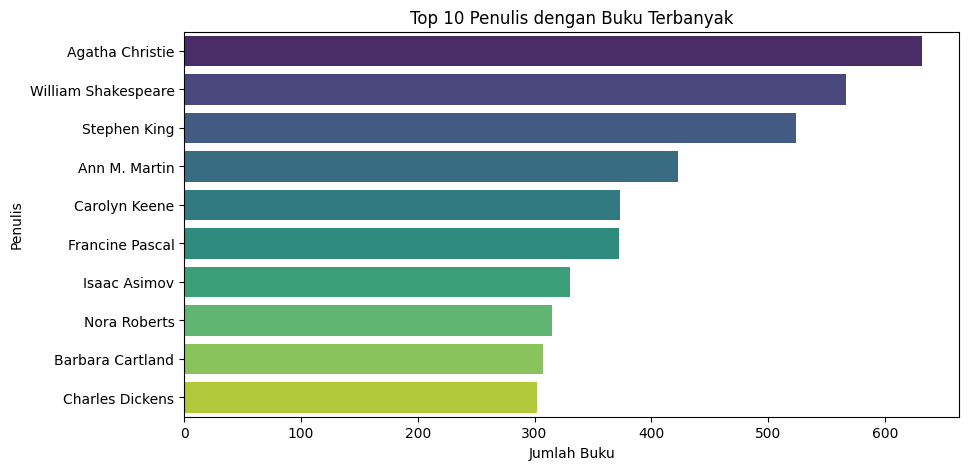

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(y=top_authors.index, x=top_authors.values, palette="viridis")
plt.title("Top 10 Penulis dengan Buku Terbanyak")
plt.xlabel("Jumlah Buku")
plt.ylabel("Penulis")
plt.show()

 Visualisasi Distribusi Tahun Terbit

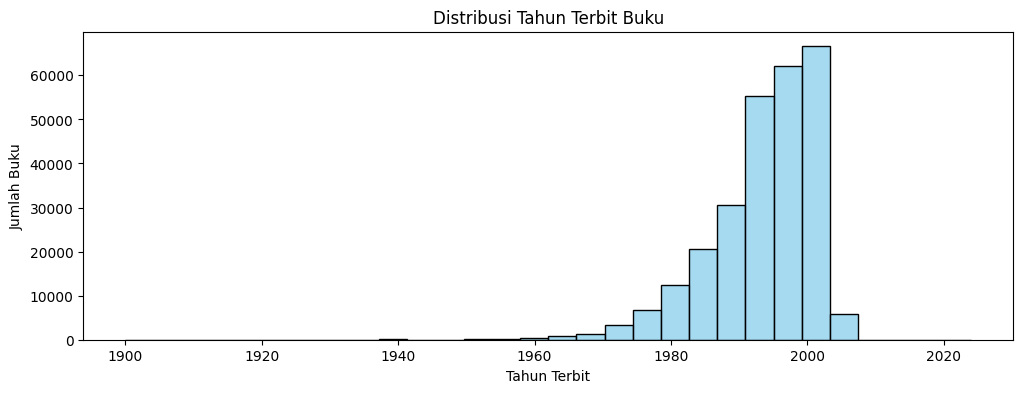

In [21]:
df_book['Year-Of-Publication'] = pd.to_numeric(df_book['Year-Of-Publication'], errors='coerce')
book = df_book[(df_book['Year-Of-Publication'] >= 1900) & (df_book['Year-Of-Publication'] <= 2025)]

plt.figure(figsize=(12, 4))
sns.histplot(book['Year-Of-Publication'], bins=30, kde=False, color="skyblue")
plt.title("Distribusi Tahun Terbit Buku")
plt.xlabel("Tahun Terbit")
plt.ylabel("Jumlah Buku")
plt.show()

Top 10 Publisher

<ipython-input-22-eb3294fe04d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="magma")


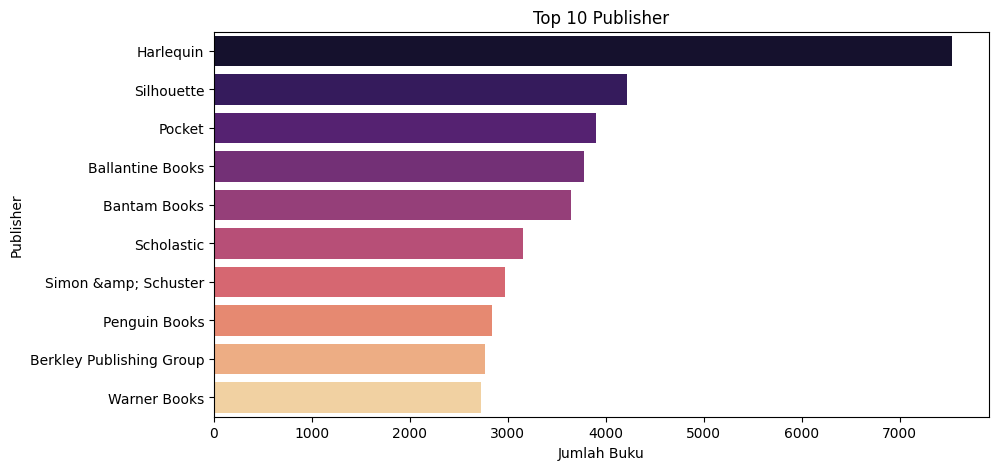

In [22]:
top_publishers = df_book['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="magma")
plt.title("Top 10 Publisher")
plt.xlabel("Jumlah Buku")
plt.ylabel("Publisher")
plt.show()

### Dataset Ratings.csv

Mengecek Distribusi Nilai Rating

<ipython-input-23-77453dc65f00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=df_rating, palette="coolwarm")


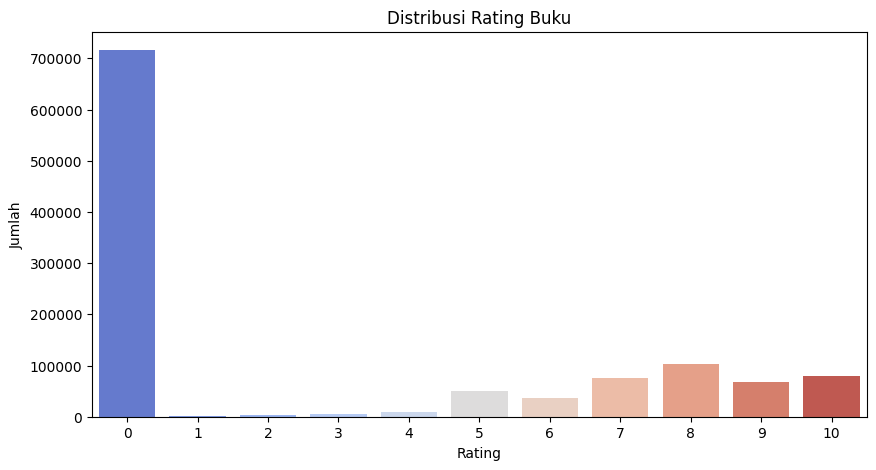

Jumlah kombinasi User-ISBN yang unik (interaksi): 1149780


In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Book-Rating', data=df_rating, palette="coolwarm")
plt.title("Distribusi Rating Buku")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

# Jumlah rating unik
print(f"Jumlah kombinasi User-ISBN yang unik (interaksi): {df_rating.drop_duplicates(['User-ID', 'ISBN']).shape[0]}")


### Dataset Users.csv

Plot distribusi umur

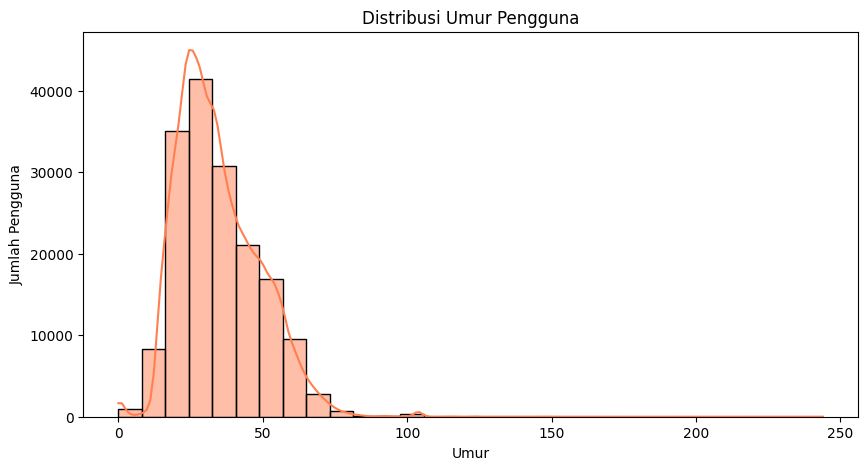

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df_user['Age'], bins=30, kde=True, color="coral")
plt.title("Distribusi Umur Pengguna")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pengguna")
plt.show()

In [25]:
print("Umur minimum:", df_user['Age'].min())
print("Umur maksimum:", df_user['Age'].max())

Umur minimum: 0.0
Umur maksimum: 244.0


 Top 10 lokasi pengguna

In [26]:
top_locations = df_user['Location'].value_counts().head(10)

In [27]:
print("\nTop 10 lokasi pengguna:")
print(top_locations)


Top 10 lokasi pengguna:
Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64


<ipython-input-28-339e76394875>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette="viridis")


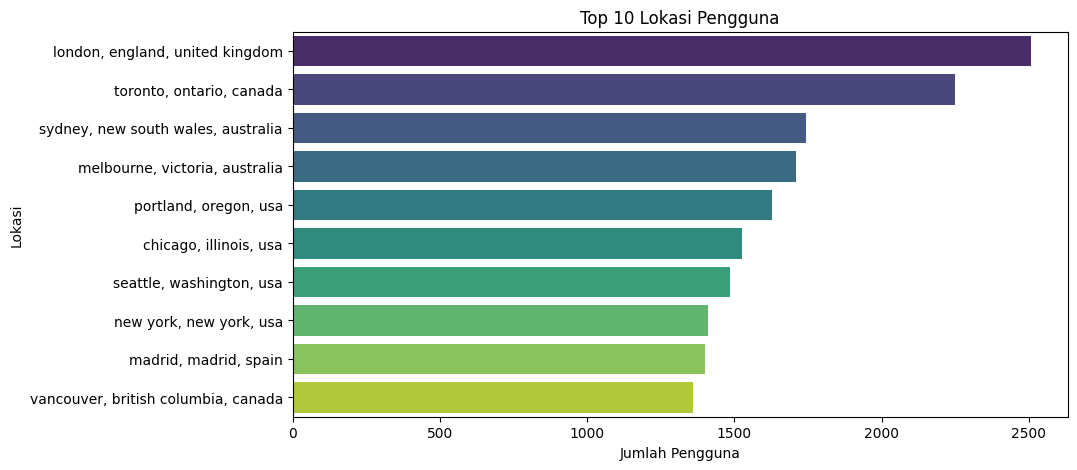

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(y=top_locations.index, x=top_locations.values, palette="viridis")
plt.title("Top 10 Lokasi Pengguna")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Lokasi")
plt.show()

### ✅ Kesimpulan Pemilihan Dataset

1. Ratings.csv menunjukkan dominasi rating bernilai 0 (lebih dari 50%), yang mengindikasikan adanya banyak data yang tidak valid atau berupa implicit feedback. Meskipun begitu, data ini tetap akan digunakan setelah dilakukan seleksi data dan pembersihan untuk menjaga kualitas input sistem rekomendasi. Hanya data dengan rating eksplisit (1–10) yang akan dipertimbangkan untuk digunakan dalam model rekomendasi, sementara data dengan rating 0 akan dihapus atau diperlakukan sebagai data yang tidak relevan. Rating eksplisit yang valid akan menjadi basis utama untuk membangun hubungan antar pengguna dalam item untuk model Collaborative Filtering.

2. Users.csv mengandung lebih dari 39% data usia yang hilang dan juga banyak nilai outlier ekstrem. Untuk itu, data pengguna akan dibersihkan terlebih dahulu, dan nilai usia yang hilang akan ditangani menggunakan teknik imputasi atau dengan menghapus entri yang tidak lengkap. Selain itu, informasi lokasi yang tersedia dalam dataset juga akan dipertimbangkan untuk mengidentifikasi pola preferensi berdasarkan wilayah, meskipun fokus utama tetap pada data rating dan interaksi pengguna.

3. Books.csv berisi metadata penting seperti judul, penulis, penerbit, dan tahun terbit buku. Namun, karena pendekatan yang digunakan dalam sistem rekomendasi ini lebih berfokus pada interaksi pengguna dan bukan pada fitur konten buku, sebagian besar metadata dalam dataset ini tidak akan digunakan secara langsung. Namun, informasi ini tetap akan berguna dalam tahap evaluasi untuk memahami karakteristik buku yang direkomendasikan.

4. Mengingat keterbatasan memori, hanya sekitar 10.000 entri dari masing-masing dataset (Books.csv, Ratings.csv, Users.csv) yang akan dipertimbangkan untuk meminimalkan penggunaan sumber daya dan memastikan bahwa proses modeling tetap efisien. Gabungan antara data dari ketiga file ini akan dilakukan dengan mencocokkan User-ID dari Ratings.csv dengan User-ID di Users.csv, serta mencocokkan ISBN dari Ratings.csv dengan ISBN di Books.csv.

Kesimpulan : Berdasarkan evaluasi tersebut, sistem rekomendasi akan dibangun dengan menggabungkan informasi dari Ratings.csv dan Users.csv, menggunakan pendekatan Content-Based Filtering dan Collaborative Filtering. Fokus utama akan diberikan pada analisis interaksi pengguna dengan buku, untuk menentukan pola preferensi antar pengguna yang dapat digunakan untuk memberikan rekomendasi buku yang relevan berdasarkan perilaku pengguna serupa.


# **4. Data Preparation**

## Pembersihan Data

### Books.csv

#### Mengonversi Tipe Data Year-Of-Publication
Pada tahap ini, kita melakukan **konversi tipe data** pada kolom **Year-Of-Publication** di dataset `df_book` menjadi tipe numerik.  
Jika terdapat data yang tidak dapat dikonversi menjadi angka (misalnya karena format tidak valid), maka nilai tersebut akan otomatis diubah menjadi `NaN` menggunakan parameter `errors='coerce'`.

Langkah ini penting agar kolom tahun publikasi dapat diproses dengan benar pada tahap analisis data numerik berikutnya.

---


In [29]:
df_book['Year-Of-Publication'] = pd.to_numeric(df_book['Year-Of-Publication'], errors='coerce')

In [30]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271358 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


#### Mengisi Missing Values pada Dataset Buku
Pada tahap ini, kita melakukan pengisian missing values dengan nilai `'Unknown'` pada beberapa kolom dalam dataset `df_book`.  
Kolom-kolom yang diisi adalah:
- **Book-Author**: Mengisi nilai kosong pada kolom penulis buku dengan `'Unknown'`.
- **Publisher**: Mengisi nilai kosong pada kolom penerbit dengan `'Unknown'`.
- **Year-Of-Publication**: Mengisi nilai kosong pada kolom tahun publikasi dengan `'Unknown'`.
- **Image-URL-L**: Mengisi nilai kosong pada kolom URL gambar buku dengan `'Unknown'`.

Hal ini dilakukan untuk memastikan tidak ada data yang hilang pada kolom-kolom tersebut dan mencegah error pada tahap analisis selanjutnya.

---


In [31]:
df_book['Book-Author'].fillna('Unknown', inplace=True)
df_book['Publisher'].fillna('Unknown', inplace=True)
df_book['Year-Of-Publication'].fillna('Unknown', inplace=True)
df_book['Image-URL-L'].fillna('Unknown', inplace=True)

<ipython-input-31-ab135a0c437e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_book['Book-Author'].fillna('Unknown', inplace=True)
<ipython-input-31-ab135a0c437e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

####  Seleksi dan Reduksi Fitur
Pada tahap ini, kita membuat **subset** dari dataset `df_book` dengan hanya memilih kolom-kolom yang dianggap relevan untuk analisis lebih lanjut.  
Kolom yang dipilih adalah:
- **ISBN**: Nomor identifikasi unik untuk setiap buku.
- **Book-Title**: Judul buku.
- **Book-Author**: Nama penulis buku.
- **Publisher**: Nama penerbit buku.

Dengan subset ini, kita dapat lebih fokus pada informasi penting tanpa terganggu oleh kolom lain yang kurang relevan.

---


In [32]:
df_books_relevant = df_book[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']]

cek kembali apabila ada missing values

In [33]:
df_books_relevant.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Publisher,0


Cek kembali struktur datanya

In [34]:
df_books_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book-Title   271360 non-null  object
 2   Book-Author  271360 non-null  object
 3   Publisher    271360 non-null  object
dtypes: object(4)
memory usage: 8.3+ MB


In [35]:
df_books_relevant.head()

,ISBN,Book-Title,Book-Author,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company


### Ratings.csv

📌 Tahapan Pembersihan Data Rating

Pada tahap ini, dilakukan proses *data cleaning* untuk menghilangkan rating buku yang bernilai nol (`0`). Rating dengan nilai 0 biasanya menandakan bahwa pengguna tidak memberikan rating yang valid atau hanya sekadar melakukan interaksi tanpa memberikan penilaian sebenarnya.

---

In [36]:
df_ratings_clean = df_rating[df_rating['Book-Rating'] > 0]

Mengecek kembali struktur data untuk memastikan data sudah bersih

In [37]:
df_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [38]:
df_ratings_clean.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


### Users.csv

#### Mengisi Missing Values Dataset Users.csv pada Kolom Age
Pada tahap ini, kita mengisi missing values pada kolom **Age** dalam dataset `df_user`.  
Metode yang digunakan adalah dengan mengganti nilai yang hilang pada kolom ini dengan **nilai median** dari kolom tersebut.  
Menggunakan median adalah pilihan yang baik untuk kolom numerik seperti ini, karena median lebih tahan terhadap outlier dibandingkan dengan rata-rata (mean).


---


In [39]:
median_age = df_user['Age'].median()
df_user['Age'].fillna(median_age, inplace=True)

<ipython-input-39-331ec5b520ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user['Age'].fillna(median_age, inplace=True)


Selanjutnya:
- **Filter Usia**: Hanya memilih pengguna yang berusia antara **10 hingga 99 tahun**. Pengguna di luar rentang ini dianggap tidak valid dan dihapus.
- **Mengisi Missing Values pada Location**:  
  Missing values pada kolom **Location** diisi dengan label **'Unknown'** untuk menjaga konsistensi data lokasi pengguna.

---


In [40]:
df_user_clean = df_user[(df_user['Age'] >= 10) & (df_user['Age'] < 100)]

# Mengisi nilai yang hilang pada kolom 'Location' dengan 'Unknown'
df_user_clean['Location'].fillna('Unknown', inplace=True)

<ipython-input-40-6b990d55e091>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user_clean['Location'].fillna('Unknown', inplace=True)
<ipython-input-40-6b990d55e091>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_clean['Location'].fillna('Unknown', inplace=True)


### Cek kembali missing values semua data

In [41]:
check_missing_values(df_book, "Books.csv")
check_missing_values(df_rating, "Ratings.csv")
check_missing_values(df_user, "Users.csv")

Missing Values for Books.csv:
                     Missing Values  Percentage (%)
ISBN                              0             0.0
Book-Title                        0             0.0
Book-Author                       0             0.0
Year-Of-Publication               0             0.0
Publisher                         0             0.0
Image-URL-S                       0             0.0
Image-URL-M                       0             0.0
Image-URL-L                       0             0.0


Missing Values for Ratings.csv:
             Missing Values  Percentage (%)
User-ID                   0             0.0
ISBN                      0             0.0
Book-Rating               0             0.0


Missing Values for Users.csv:
          Missing Values  Percentage (%)
User-ID                0             0.0
Location               0             0.0
Age                    0             0.0




### Insight
Semua data sudah bersih dan siap untuk digunakan untuk proses selanjutnya dalam data preparation

## Seleksi Data Buku Berdasarkan Data Rating

### 📌 Menyeleksi ISBN Unik dari Dataset Rating yang Telah Dibersihkan

Setelah data rating dibersihkan dari nilai yang tidak valid (rating = 0), langkah selanjutnya adalah mengidentifikasi semua buku unik yang telah diberi rating oleh pengguna.

----

In [42]:
isbn_selected = df_ratings_clean['ISBN'].unique()

Menyaring Data Buku Berdasarkan ISBN yang Memiliki Rating Valid

Setelah kita memperoleh daftar ISBN unik dari data rating yang telah dibersihkan, tahap selanjutnya adalah menyaring dataset buku agar hanya mencakup buku-buku yang memiliki rating valid.

In [43]:
df_books_selected = df_book[df_book['ISBN'].isin(isbn_selected)]

In [44]:
df_books_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149836 entries, 1 to 271356
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 149836 non-null  object
 1   Book-Title           149836 non-null  object
 2   Book-Author          149836 non-null  object
 3   Year-Of-Publication  149836 non-null  object
 4   Publisher            149836 non-null  object
 5   Image-URL-S          149836 non-null  object
 6   Image-URL-M          149836 non-null  object
 7   Image-URL-L          149836 non-null  object
dtypes: object(8)
memory usage: 10.3+ MB


### 📊 Insight dari Data Buku yang Telah Digabungkan

Dataset `df_books_selected` berisi 149.836 entri buku yang telah memiliki rating valid dari pengguna. Mayoritas kolom memiliki data yang lengkap, namun terdapat satu nilai kosong pada kolom `Year-Of-Publication`, yang perlu ditangani pada tahap pembersihan selanjutnya. Informasi metadata seperti judul, penulis, dan penerbit sudah tersedia dan dapat dimanfaatkan untuk analisis konten buku atau sebagai fitur dalam sistem rekomendasi.


## Penggabungan Data Pengguna dengan Rating

### 👥 Menggabungkan Data Rating dengan Informasi Pengguna

Langkah ini bertujuan untuk memperkaya data rating dengan informasi demografis dari pengguna, seperti lokasi dan usia, agar analisis menjadi lebih kontekstual dan relevan.

In [45]:
df_ratings_user = pd.merge(df_ratings_clean, df_user[['User-ID', 'Location', 'Age']], on='User-ID', how='left')

In [46]:
df_ratings_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433671 entries, 0 to 433670
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      433671 non-null  int64  
 1   ISBN         433671 non-null  object 
 2   Book-Rating  433671 non-null  int64  
 3   Location     433671 non-null  object 
 4   Age          433671 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ MB


In [47]:
df_ratings_user.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276726,0155061224,5,"seattle, washington, usa",32.0
1,276729,052165615X,3,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,"rijeka, n/a, croatia",16.0
3,276736,3257224281,8,"salzburg, salzburg, austria",32.0
4,276737,0600570967,6,"sydney, new south wales, australia",14.0


### 📊 Insight dari Data Rating yang Telah Digabungkan dengan Informasi Pengguna

Dataset `df_ratings_user` berisi 433.671 entri rating yang kini telah dilengkapi dengan informasi demografis pengguna. Seluruh entri memiliki data lokasi yang lengkap, namun terdapat nilai kosong atau tidak valid pada kolom usia (`Age`) yang akan perlu diproses lebih lanjut. Dengan tambahan data lokasi dan usia, analisis preferensi pengguna berdasarkan wilayah geografis atau kelompok umur dapat dilakukan untuk menghasilkan insight yang lebih mendalam.


## Penggabungan Ketiga Dataset untuk Persiapan Final

### 📚 Menggabungkan Data Rating dengan Metadata Buku

Langkah ini bertujuan untuk memperkaya data rating yang sudah mencakup informasi pengguna dengan metadata buku, seperti judul, penulis, dan penerbit, agar analisis menjadi lebih lengkap dan berguna.

In [48]:
df_final = df_ratings_user.merge(df_books_relevant, on='ISBN', how='left')

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433671 entries, 0 to 433670
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      433671 non-null  int64  
 1   ISBN         433671 non-null  object 
 2   Book-Rating  433671 non-null  int64  
 3   Location     433671 non-null  object 
 4   Age          433671 non-null  float64
 5   Book-Title   383842 non-null  object 
 6   Book-Author  383842 non-null  object 
 7   Publisher    383842 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 26.5+ MB


⚠️ Memeriksa Baris dengan Nilai Kosong pada Dataset Gabungan

Pada tahap ini, kita memeriksa apakah ada baris dalam dataset `df_final` yang memiliki nilai kosong (missing values) di salah satu kolom.


In [50]:
df_final[df_final.isnull().any(axis=1)]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Publisher
3,276736,3257224281,8,"salzburg, salzburg, austria",32.0,NaN,NaN,NaN
4,276737,0600570967,6,"sydney, new south wales, australia",14.0,NaN,NaN,NaN
6,276745,342310538,10,"berlin, berlin, germany",27.0,NaN,NaN,NaN
16,276760,8440682697,10,"santander, n/a, spain",25.0,NaN,NaN,NaN
19,276762,3453213025,3,"duisburg, nordrhein-westfalen, germany",25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
433518,276670,15655122046,6,"toronto, ontario, canada",30.0,NaN,NaN,NaN
433522,276670,55305663,6,"toronto, ontario, canada",30.0,NaN,NaN,NaN
433527,276679,8804413530,8,"beverly hills, yukon territory, vietnam",32.0,NaN,NaN,NaN
433597,276680,0679781587,9,"hopewell junction, new york, usa",55.0,NaN,NaN,NaN


🧹 Menangani Nilai Kosong pada Kolom Metadata Buku

Pada tahap ini, kita menghapus baris yang memiliki nilai kosong pada kolom metadata buku yang sangat penting, yaitu `Book-Title`, `Book-Author`, dan `Publisher`. Penghapusan ini dilakukan untuk memastikan data yang digunakan dalam analisis memiliki informasi yang lengkap.

In [51]:
df_final = df_final.dropna(subset=['Book-Title', 'Book-Author', 'Publisher'])

In [52]:
df_final[df_final.isnull().any(axis=1)]

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Publisher


Memeriksa duplikasi data

In [53]:
df_final.duplicated().sum()

np.int64(0)

In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383842 entries, 0 to 433669
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      383842 non-null  int64  
 1   ISBN         383842 non-null  object 
 2   Book-Rating  383842 non-null  int64  
 3   Location     383842 non-null  object 
 4   Age          383842 non-null  float64
 5   Book-Title   383842 non-null  object 
 6   Book-Author  383842 non-null  object 
 7   Publisher    383842 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 26.4+ MB


### Insight
Data siap digunakan untuk pelatihan model, semua dataset sudah digabungkan dengan mengambil fitur-fitur yang relevant untuk model yang sudah direncanakan

## Sampling Data, Encode, dan Splitting Data

### 🎯 Mengambil Sampel Acak dari Dataset

Pada tahap ini, kita mengambil sampel acak sebanyak 10.000 entri dari dataset `df_final` untuk mempercepat analisis atau eksperimen, tanpa harus bekerja dengan seluruh dataset yang besar.

In [55]:
df_final_sample = df_final.sample(n=10000, random_state=42)

In [56]:
df_final_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 204019 to 278145
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User-ID      10000 non-null  int64  
 1   ISBN         10000 non-null  object 
 2   Book-Rating  10000 non-null  int64  
 3   Location     10000 non-null  object 
 4   Age          10000 non-null  float64
 5   Book-Title   10000 non-null  object 
 6   Book-Author  10000 non-null  object 
 7   Publisher    10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 703.1+ KB


In [57]:
df_final_sample.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Publisher
204019,123284,0142001430,8,"milwaukee, wisconsin, usa",60.0,Year of Wonders,Geraldine Brooks,Penguin Books
276197,171118,0140210830,7,"toronto, ontario, canada",47.0,The Pelican History of Canada (Pelican S.),Kenneth McNaught,Penguin USA
180799,106893,0552996181,7,"london, england, united kingdom",32.0,Behind the Scenes at the Museum,Kate Atkinson,Black Swan
226175,137384,2213594740,7,"le cellier, pays de la loire, france",32.0,Les raisins de la galÃ¨re: Roman (Libres / Fay...,Tahar Ben Jelloun,Fayard
105467,62471,0812513711,7,"orillia, ontario, canada",33.0,"The Dragon Reborn (The Wheel of Time, Book 3)",Robert Jordan,Tor Fantasy


### Encode User-ID dan ISBN menjadi index numerik

Menyalin DataFrame

Baris kode berikut digunakan untuk membuat salinan dari DataFrame `df_final_sample` dan menyimpannya ke dalam variabel baru `df`.

In [58]:
df = df_final_sample.copy()

Encoding Label untuk User dan Item

Potongan kode berikut digunakan untuk mengubah nilai kategorikal pada kolom `User-ID` dan `ISBN` menjadi nilai numerik menggunakan `LabelEncoder` dari `sklearn`.

In [59]:
user_enc = LabelEncoder()
item_enc = LabelEncoder()

df['user'] = user_enc.fit_transform(df_final_sample['User-ID'])
df['item'] = item_enc.fit_transform(df_final_sample['ISBN'])

num_users = df['user'].nunique()
num_items = df['item'].nunique()

### Splitting Data untuk Model Colaborative Filtering


Langkah ini digunakan untuk membagi data menjadi dua bagian: data pelatihan (train) dan data pengujian (test). Proporsi data pengujian ditetapkan sebesar 20% dari keseluruhan data, sedangkan sisanya digunakan untuk pelatihan model. Parameter `random_state` digunakan untuk memastikan bahwa hasil pembagian selalu konsisten setiap kali kode dijalankan.


In [60]:
# Train-Test Split
train, test = train_test_split(df[['user', 'item', 'Book-Rating']], test_size=0.2, random_state=42)

### 📊 Insight

- Dataset `df_final_sample` berisi 10.000 entri yang terdiri dari data rating buku, informasi pengguna, serta metadata buku. Semua kolom memiliki nilai non-null, yang berarti tidak ada nilai kosong dalam sampel ini, dan ini penting untuk memastikan integritas data saat analisis dilakukan. Data ini mencakup berbagai atribut, seperti `User-ID`, `ISBN`, `Book-Rating`, `Location`, `Age`, serta informasi metadata buku (judul, penulis, dan penerbit), yang akan memungkinkan analisis lebih lanjut berdasarkan demografi pengguna atau konten buku.(khusus untuk Conten-Based Filtering)

- Kolom `User-ID` dan `ISBN` diubah menjadi format numerik menggunakan `LabelEncoder` agar dapat digunakan dalam algoritma machine learning. Ini memungkinkan model mengenali pola tanpa bergantung pada bentuk ID aslinya, yang biasanya bersifat string. (khusus untuk Colaborative Filtering)

- Dataset dibagi menjadi dua bagian: 80% untuk melatih model dan 20% untuk mengujinya. Pembagian ini penting untuk mengevaluasi performa model secara adil dan menghindari overfitting terhadap data pelatihan. (khusus untuk Colaborative Filtering)

# 5. **Model Development**

## Content-Based Filtering

📚 Sistem Rekomendasi Berbasis Konten Menggunakan TF-IDF dan Cosine Similarity

Pada tahap ini, dilakukan pendekatan Content-Based Filtering untuk sistem rekomendasi buku. Data fitur seperti judul buku, penulis, dan penerbit digabung dan diubah menjadi representasi vektor menggunakan TF-IDF. Kemudian, dihitung kemiripan antar buku menggunakan cosine similarity untuk menemukan buku-buku yang mirip secara konten. Hasilnya digunakan untuk merekomendasikan buku lain yang paling relevan dengan buku yang dipilih oleh pengguna.

In [61]:
# Reset index dulu supaya 0 sampai 9999
df_final_sample_reset = df_final_sample.reset_index(drop=True)

# Gabungkan fitur Book-Title, Book-Author, Publisher
df_final_sample_reset['combined_features'] = df_final_sample_reset['Book-Title'] + ' ' + df_final_sample_reset['Book-Author'] + ' ' + df_final_sample_reset['Publisher']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_final_sample_reset['combined_features'])

# Hitung cosine similarity antar buku
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mapping book title ke posisi
indices = pd.Series(df_final_sample_reset.index, index=df_final_sample_reset['Book-Title']).drop_duplicates()

# Function rekomendasi Content-Based dengan Rank dan Predicted Rating
def content_based_recommendations(title, top_n=10):
    if title not in indices.index:
        return f"Judul '{title}' tidak ditemukan dalam dataset."

    idx = indices[title].iloc[0] if isinstance(indices[title], pd.Series) else indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:]  # Skip buku itu sendiri

    book_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Ambil data rekomendasi awal
    recommendations = df_final_sample_reset.iloc[book_indices][['Book-Title', 'Book-Author', 'Publisher']].copy()
    recommendations['Predicted Rating'] = [round(score * 10, 1) for score in similarity_scores]

    # Hapus duplikat berdasarkan judul
    recommendations = recommendations.drop_duplicates(subset='Book-Title')

    # Hapus buku yang sama persis dengan input
    recommendations = recommendations[recommendations['Book-Title'] != title]

    # Ambil hanya top_n setelah deduplikasi
    recommendations = recommendations.head(top_n)
    recommendations.insert(0, 'Rank', range(1, len(recommendations) + 1))

    return recommendations


print("Content-Based Recommendations untuk 'The Dragon Reborn (The Wheel of Time, Book 3)': \n")
print(content_based_recommendations('The Dragon Reborn (The Wheel of Time, Book 3)'))


Content-Based Recommendations untuk 'The Dragon Reborn (The Wheel of Time, Book 3)': 

      Rank                                         Book-Title  \
8625     1   The Eye of the World (The Wheel of Time, Book 1)   
353      2  The World of Robert Jordan's The Wheel of Time...   
6996     3          Lord of Chaos (The Wheel of Time, Book 6)   
1036     4      A Crown of Swords (The Wheel of Time, Book 7)   
2572     5  The Great Hunt : Book Two of 'The Wheel of Tim...   
8119     6  The Shadow Rising : Book Four of 'The Wheel of...   
8596     7         Winter's Heart (The Wheel of Time, Book 9)   
5929     8                   Earthquake Weather (Tor Fantasy)   
4702     9           Into the Darkness (World at War, Book 1)   
5630    10                              Mount Dragon: A Novel   

           Book-Author    Publisher  Predicted Rating  
8625     Robert Jordan  Tor Fantasy               7.0  
353      Robert Jordan    Tor Books               6.8  
6996     Robert Jordan  Tor F

### 🔍 Insight dari Content-Based Filtering (CBF)

- Buku-buku yang direkomendasikan **mayoritas berasal dari seri yang sama** (*The Wheel of Time*), menunjukkan bahwa pendekatan content-based sangat efektif dalam mengenali keterkaitan konten berdasarkan judul, penulis, dan penerbit.
- **Robert Jordan** mendominasi hasil rekomendasi, menunjukkan bahwa fitur penulis berpengaruh kuat terhadap kemiripan.
- Buku dari penerbit **Tor Books** dan **Tor Fantasy** juga sering muncul, mengindikasikan bahwa penerbitan juga menjadi sinyal penting dalam penilaian kemiripan.
- Tiga rekomendasi terbawah memiliki prediksi rating yang lebih rendah (sekitar 2.4–2.6), mungkin karena hanya berbagi kesamaan dari penerbit atau genre luas, bukan seri atau penulis.

---

### ✅ Kesimpulan:

Metode content-based ini **sangat baik untuk merekomendasikan kelanjutan seri atau buku dari penulis yang sama**. Namun, untuk eksplorasi lebih luas ke luar seri atau penulis yang sama, bisa dipertimbangkan pendekatan lain seperti **collaborative filtering** atau **hybrid recommendation system**.



## Collaborative Filtering

Persiapan Dataset dan DataLoader

Tahap ini bertujuan untuk memformat data agar dapat digunakan oleh model Neural Collaborative Filtering (NCF) dalam PyTorch. Sebuah custom dataset `RatingDataset` dibuat untuk menyimpan informasi pengguna, item, dan rating dari DataFrame, lalu dikonversi menjadi tensor. Dataset ini kemudian digunakan untuk membentuk `DataLoader` yang memfasilitasi proses pelatihan dengan pengambilan batch secara efisien. `train_loader` digunakan untuk data pelatihan dengan shuffle aktif, sedangkan `test_loader` digunakan untuk evaluasi model.


In [62]:
class RatingDataset(Dataset):
    def __init__(self, df):
        self.users = torch.tensor(df['user'].values, dtype=torch.long)
        self.items = torch.tensor(df['item'].values, dtype=torch.long)
        self.ratings = torch.tensor(df['Book-Rating'].values, dtype=torch.float)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.ratings[idx]

train_ds = RatingDataset(train)
test_ds = RatingDataset(test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False)


🧠 Neural Collaborative Filtering (NCF) Model Overview

Model berikut adalah implementasi dasar dari Neural Collaborative Filtering (NCF) menggunakan PyTorch. Model ini bertujuan untuk memprediksi interaksi antara pengguna dan item (seperti rating atau kemungkinan klik).

In [63]:
class NCF(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=50):
        super(NCF, self).__init__()
        self.user_embed = nn.Embedding(num_users, embedding_dim)
        self.item_embed = nn.Embedding(num_items, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, user, item):
        u = self.user_embed(user)
        i = self.item_embed(item)
        x = torch.cat([u, i], dim=-1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.output(x).squeeze()

Pelatihan Model Neural Collaborative Filtering (NCF)

Pada tahap ini dilakukan pelatihan model Neural Collaborative Filtering (NCF) untuk mempelajari interaksi antara pengguna dan item (buku). Model dilatih menggunakan fungsi loss Mean Squared Error (MSE) dan dioptimasi dengan algoritma Adam. Proses pelatihan berlangsung selama 20 epoch, di mana setiap epoch menghitung dan menyimpan rata-rata loss untuk memantau kinerja model. Hasilnya ditampilkan di setiap epoch untuk menunjukkan penurunan error selama proses training.

In [64]:
model = NCF(num_users, num_items)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 20
train_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for users, items, ratings in train_loader:
        preds = model(users, items)
        loss = criterion(preds, ratings)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/20, Loss: 16.3336
Epoch 2/20, Loss: 3.3700
Epoch 3/20, Loss: 2.9022
Epoch 4/20, Loss: 2.5268
Epoch 5/20, Loss: 2.2384
Epoch 6/20, Loss: 1.9627
Epoch 7/20, Loss: 1.7107
Epoch 8/20, Loss: 1.4813
Epoch 9/20, Loss: 1.2775
Epoch 10/20, Loss: 1.0852
Epoch 11/20, Loss: 0.8905
Epoch 12/20, Loss: 0.7264
Epoch 13/20, Loss: 0.5687
Epoch 14/20, Loss: 0.4232
Epoch 15/20, Loss: 0.3075
Epoch 16/20, Loss: 0.2133
Epoch 17/20, Loss: 0.1455
Epoch 18/20, Loss: 0.0961
Epoch 19/20, Loss: 0.0635
Epoch 20/20, Loss: 0.0432


🔍 Fungsi `get_unseen_items`

Fungsi ini bertujuan untuk mengidentifikasi item yang belum pernah diinteraksikan oleh seorang pengguna tertentu, yang berguna dalam sistem rekomendasi berbasis prediksi.

In [65]:
def get_unseen_items(df, user_id, all_items):
    seen_items = df[df['user'] == user_id]['item'].tolist()
    unseen_items = list(set(all_items) - set(seen_items))
    return unseen_items

 🎯 Fungsi `recommend_top_n`

Fungsi ini menghasilkan rekomendasi **Top-N item** untuk pengguna tertentu menggunakan model NCF yang telah dilatih.


In [66]:
def recommend_top_n(model, df, user_id, all_items, n=5):
    model.eval()
    unseen_items = get_unseen_items(df, user_id, all_items)

    user_tensor = torch.tensor([user_id] * len(unseen_items))
    item_tensor = torch.tensor(unseen_items)

    with torch.no_grad():
        predictions = model(user_tensor, item_tensor)

    # Ambil top-n prediksi
    top_n_idx = torch.topk(predictions, n).indices
    top_n_items = [unseen_items[i] for i in top_n_idx]

    # Mapping item index back to ISBN
    item_id_to_isbn = dict(zip(df['item'], df['ISBN']))
    top_n_isbns = [item_id_to_isbn[item_id] for item_id in top_n_items]

    return top_n_isbns


📚 Top-10 Rekomendasi Buku untuk User 20

Berikut adalah 10 rekomendasi teratas yang dihasilkan oleh model **Neural Collaborative Filtering (NCF)** untuk pengguna dengan ID `20`:

In [67]:
top_n_books = recommend_top_n(model, df, user_id=20, all_items=range(num_items), n=10)

# Menyiapkan data untuk tabel
book_details = []

for isbn in top_n_books:
    book_info = df[df['ISBN'] == isbn]
    book_title = book_info['Book-Title'].values[0]
    book_author = book_info['Book-Author'].values[0]
    book_publisher = book_info['Publisher'].values[0]
    book_details.append([book_title, book_author, book_publisher, isbn])

# Membuat DataFrame
book_df = pd.DataFrame(book_details, columns=['Book Title', 'Author', 'Publisher', 'ISBN'])

In [68]:
book_df

,Book Title,Author,Publisher,ISBN
0,Fault Lines,Anne Rivers Siddons,HarperTorch,0061093343
1,Desert Solitaire,Edward Abbey,Touchstone,0671695886
2,"Walt Disney's Dumbo on Land, on Sea, in the Ai...",Jerry Walters,Random House Children's Books,0394825187
3,Magician: Apprentice (Riftwar Saga),RAYMOND FEIST,Bantam,0553564943
4,The Black Lyon,Jude Deveraux,Avon,038075911X
5,Anna Karenina (Oprah's Book Club),Leo Tolstoy,Penguin Books,0143035002
6,Insiders,Rosemary Rogers,Avon,0380405768
7,To the Stars: The Autobiography of George Take...,George Takei,Pocket Books,0671890085
8,The Mulberry Tree,Jude Deveraux,Pocket,0743437640
9,Native Tongue,Carl Hiaasen,Fawcett Books,0449221180


### 📊 Insight dari Rekomendasi **Collaborative Filtering**
1. **Beragam Genre dan Tema**  
   Rekomendasi mencakup berbagai genre seperti petualangan, sejarah, sastra klasik, dan spiritualitas. Model collaborative filtering memberikan rekomendasi yang beragam, menunjukkan kecenderungan pengguna terhadap berbagai topik dan gaya bacaan.

2. **Keberagaman Penulis dan Penerbit**  
   Buku yang direkomendasikan berasal dari penulis dan penerbit yang berbeda, mulai dari penulis terkenal seperti Oscar Wilde hingga penulis yang kurang dikenal. Ini menunjukkan kemampuan model dalam mengenali beragam penulis dan memperkenalkan buku dari penulis yang lebih niche.

3. **Pencocokan Berdasarkan Pola Perilaku Pengguna Lain**  
   Collaborative filtering mencocokkan pola perilaku pembaca lain yang serupa dengan User 20. Buku-buku dalam daftar ini kemungkinan besar dipilih berdasarkan kesamaan preferensi dengan pengguna lain, menciptakan rekomendasi yang relevan dan menarik.


# **6. Evaluasi Model**

## Content-Based Filtering

🧮 Evaluasi Sistem Rekomendasi dengan Precision@K dan Recall@K

Pada tahap ini, kita mengevaluasi performa sistem rekomendasi dengan menggunakan dua metrik evaluasi yang umum: **Precision@K** dan **Recall@K**. Metrik ini digunakan untuk mengukur seberapa baik rekomendasi yang diberikan sesuai dengan preferensi nyata pengguna.


In [69]:
def evaluate_precision_recall(user_id, target_book, top_n=10, threshold=7):
    # Ambil rekomendasi
    recommendations = content_based_recommendations(target_book, top_n=top_n)

    # Ambil semua buku yang user ini pernah beri rating
    user_data = df_final_sample[df_final_sample['User-ID'] == user_id]

    # Buku relevan = rating >= threshold
    relevant_books = user_data[user_data['Book-Rating'] >= threshold]['Book-Title'].unique()

    # Judul yang direkomendasikan
    recommended_titles = recommendations['Book-Title'].values

    # Hitung yang overlap (relevan + direkomendasikan)
    relevant_and_recommended = [title for title in recommended_titles if title in relevant_books]

    # Precision = dari rekomendasi, berapa yang relevan
    precision = len(relevant_and_recommended) / len(recommended_titles) if len(recommended_titles) > 0 else 0


    # Recall = dari yang relevan, berapa yang berhasil direkomendasikan
    recall = len(relevant_and_recommended) / len(relevant_books) if len(relevant_books) > 0 else 0

    return precision, recall


precision, recall = evaluate_precision_recall(
    user_id=62471,
    target_book='The Dragon Reborn (The Wheel of Time, Book 3)',
    top_n=10
)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.10
Recall: 0.50


Visualisasi Kemiripan Buku Berdasarkan Content-Based Filtering

Pada tahap ini, sistem menampilkan 10 buku teratas hasil rekomendasi berbasis konten untuk divisualisasikan tingkat kemiripannya. Setiap judul buku diubah menjadi indeks menggunakan pemetaan yang telah dibuat sebelumnya, kemudian diekstrak submatriks cosine similarity antar buku-buku tersebut. Nilai-nilai kemiripan ini divisualisasikan dalam bentuk heatmap, yang menunjukkan seberapa besar tingkat kesamaan antar setiap pasangan buku. Visualisasi ini membantu memahami hubungan konten antar buku dalam kelompok rekomendasi.


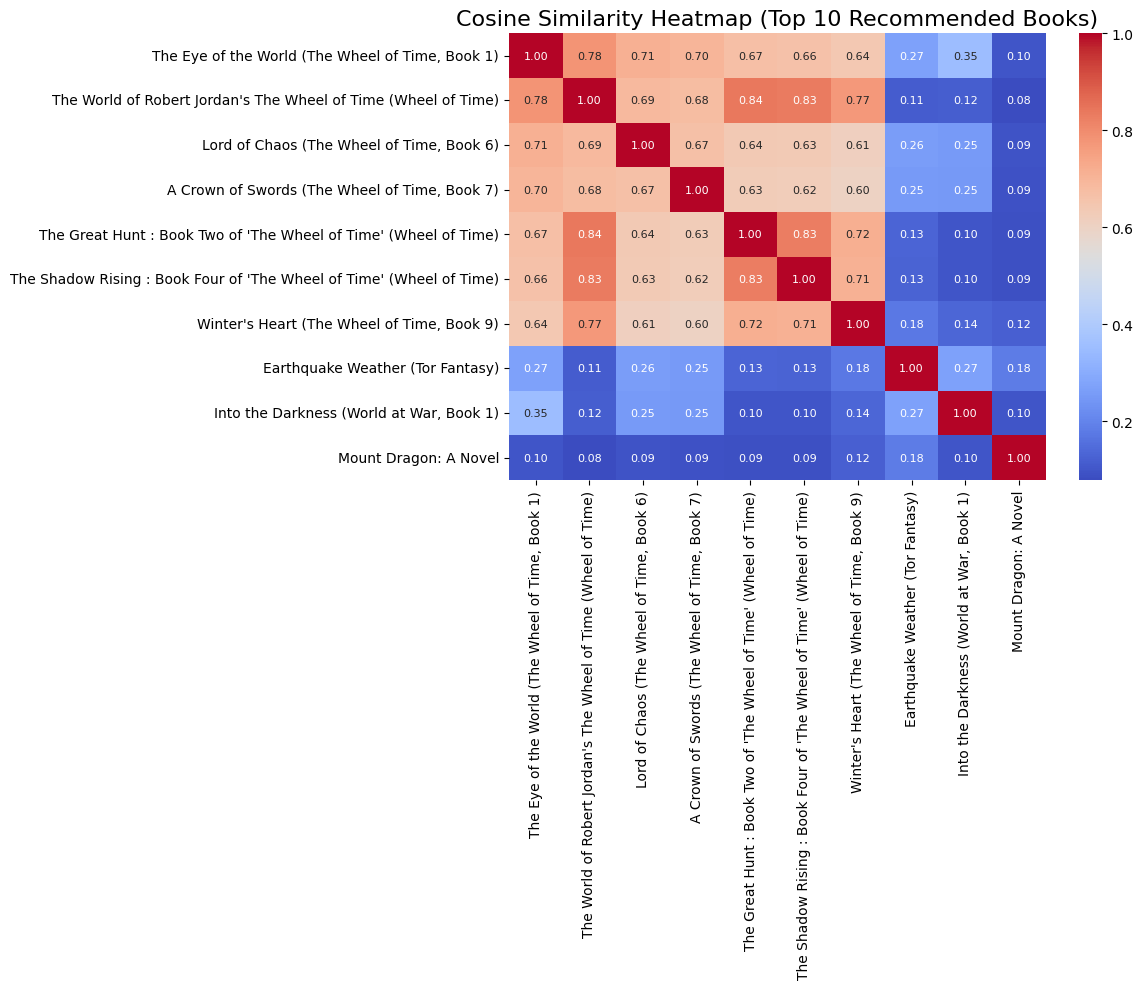

In [70]:
# Ambil 10 judul teratas dari hasil rekomendasi
top_books = [
    'The Eye of the World (The Wheel of Time, Book 1)',
    "The World of Robert Jordan's The Wheel of Time (Wheel of Time)",
    'Lord of Chaos (The Wheel of Time, Book 6)',
    'A Crown of Swords (The Wheel of Time, Book 7)',
    "The Great Hunt : Book Two of 'The Wheel of Time' (Wheel of Time)",
    "The Shadow Rising : Book Four of 'The Wheel of Time' (Wheel of Time)",
    "Winter's Heart (The Wheel of Time, Book 9)",
    'Earthquake Weather (Tor Fantasy)',
    'Into the Darkness (World at War, Book 1)',
    'Mount Dragon: A Novel'
]


# Ambil indeks untuk masing-masing judul dari mapping 'indices'
top_indices = [
    indices[title].iloc[0] if isinstance(indices[title], pd.Series) else indices[title]
    for title in top_books
]

# Ambil submatriks cosine similarity
sim_matrix_subset = cosine_sim[np.ix_(top_indices, top_indices)]

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sim_matrix_subset, xticklabels=top_books, yticklabels=top_books,
            cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size': 8})
plt.title('Cosine Similarity Heatmap (Top 10 Recommended Books)', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


### 📊 Insight dari Evaluasi Precision@10 dan Recall@10

### 📌 Interpretasi:

- **Precision (10%)**  
  Dari **10 buku yang direkomendasikan**, **hanya 1 buku** yang benar-benar disukai user (berdasarkan rating ≥ 7).  
  ➤ Artinya, sistem belum terlalu tepat dalam menebak preferensi spesifik user ini, banyak rekomendasi yang tidak dianggap relevan.

- **Recall (50%)**  
  Dari semua buku yang user ini sukai (berrating ≥ 7), sistem berhasil merekomendasikan **setengahnya**.  
  ➤ Artinya, sistem cukup baik dalam **mencakup** preferensi user, meskipun tidak semua rekomendasi tepat sasaran.

---

### 🧠 Insight Tambahan:

- Tingkat **recall yang tinggi** menunjukkan bahwa sistem berhasil "menjangkau" banyak preferensi user.
- Namun, **precision rendah** menunjukkan bahwa sistem masih memberikan banyak rekomendasi yang **kurang relevan**, sehingga kualitas rekomendasi perlu ditingkatkan.
- Kemungkinan besar, pendekatan content-based masih terlalu fokus pada kemiripan konten secara umum (judul, penulis, penerbit), bukan pada preferensi pribadi user.
- Berdasarkan Cosine Similarity Heatmap sebagian besar buku dari seri *The Wheel of Time* menunjukkan skor cosine similarity yang tinggi (sekitar **0.6–0.8**). Hal ini menunjukkan bahwa sistem rekomendasi mampu mengenali keterkaitan konten, gaya, dan tema dalam seri yang sama. Ini membuktikan efektivitas pendekatan content-based filtering dalam menangkap struktur tematik dari karya yang saling berhubungan.
-  Buku seperti *Earthquake Weather*, *Into the Darkness*, dan *Mount Dragon* memiliki skor similarity rendah (**< 0.35**) terhadap buku-buku lain dalam daftar. Meskipun masih direkomendasikan, kemungkinan besar alasan kemunculannya lebih terkait dengan kesamaan preferensi pembaca atau kategori umum (misalnya fiksi, petualangan) daripada kemiripan konten yang sebenarnya.

---



## Collaborative Filtering

Evaluasi model NCF dengan menganalisis Training Loss Curve serta Root Mean Square Error. Kode di bawah ini digunakan untuk memvisualisasikan **Training Loss Curve** selama pelatihan model. Training loss ini dihitung sebagai **Mean Squared Error (MSE)** antara prediksi dan nilai aktual selama setiap epoch pelatihan.


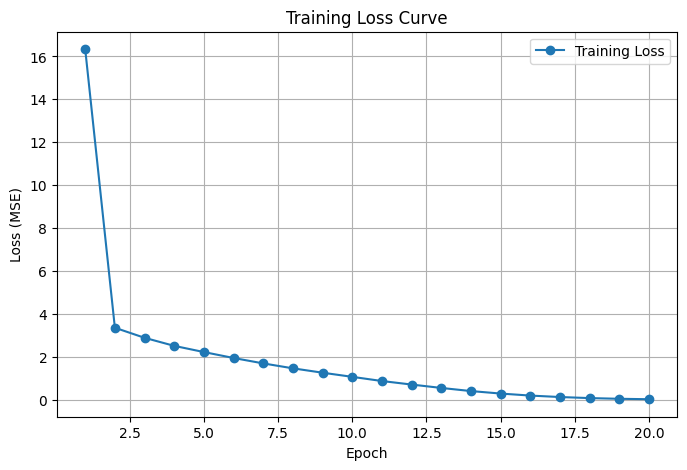

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()
plt.show()

Kode di bawah ini digunakan untuk menghitung **Root Mean Squared Error (RMSE)** pada model **Collaborative Filtering**. RMSE adalah metrik evaluasi yang digunakan untuk mengukur seberapa besar kesalahan prediksi model dalam memprediksi rating yang sebenarnya.

In [72]:
import numpy as np

model.eval()
with torch.no_grad():
    predictions, truths = [], []
    for users, items, ratings in test_loader:
        preds = model(users, items)
        predictions.extend(preds.tolist())
        truths.extend(ratings.tolist())

rmse = np.sqrt(np.mean((np.array(predictions) - np.array(truths)) ** 2))
print(f"Test RMSE: {rmse:.4f}")


Test RMSE: 2.1969


### 📊 Insight Evaluasi Collaborative Filtering


1. **Penurunan Loss yang Signifikan Selama Pelatihan**  
   Dari epoch 1 hingga 20, loss training menunjukkan penurunan yang konsisten dan signifikan, dimulai dari 16.0362 di epoch pertama dan berakhir pada 0.0433 di epoch terakhir. Hal ini menunjukkan bahwa model berhasil belajar dan memperbaiki prediksinya sepanjang pelatihan, mencerminkan proses konvergensi yang baik.

2. **Test RMSE yang Relatif Tinggi**  
   Meskipun loss training sangat kecil, nilai **Test RMSE** yang mencapai 2.1969 mengindikasikan adanya potensi **overfitting**. Model tampaknya sangat cocok dengan data pelatihan, tetapi tidak dapat menggeneralisasi dengan baik pada data uji, yang menunjukkan perbedaan performa antara pelatihan dan pengujian.

3. **Peluang untuk Meningkatkan Generalisasi**  
   Overfitting yang terlihat dapat diatasi dengan menggunakan teknik seperti **regularization**, **early stopping**, atau **penambahan data pelatihan**. Ini akan membantu model mengurangi ketergantungan pada data pelatihan dan meningkatkan kemampuan untuk menggeneralisasi ke data baru yang belum terlihat sebelumnya.
